In [6]:
#CSV Loading to Data frame
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Stress_Fault_Data_CSV/SA_CPU_Node-FrontendVsPod-Frontend.csv')
df.tail(10)

CPU_Pod_Frontend  CPU_Node_Frontend
322           0.00161           0.000256
323           0.00162           0.000268
324           0.00156           0.000256
325           0.00155           0.000271
326           0.00161           0.000329
327           0.00159           0.000277
328           0.00156           0.000243
329           0.00156           0.000259
330           0.00158           0.000261
331           0.00148           0.000244

In [7]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['CPU_Pod_Frontend','CPU_Node_Frontend'])

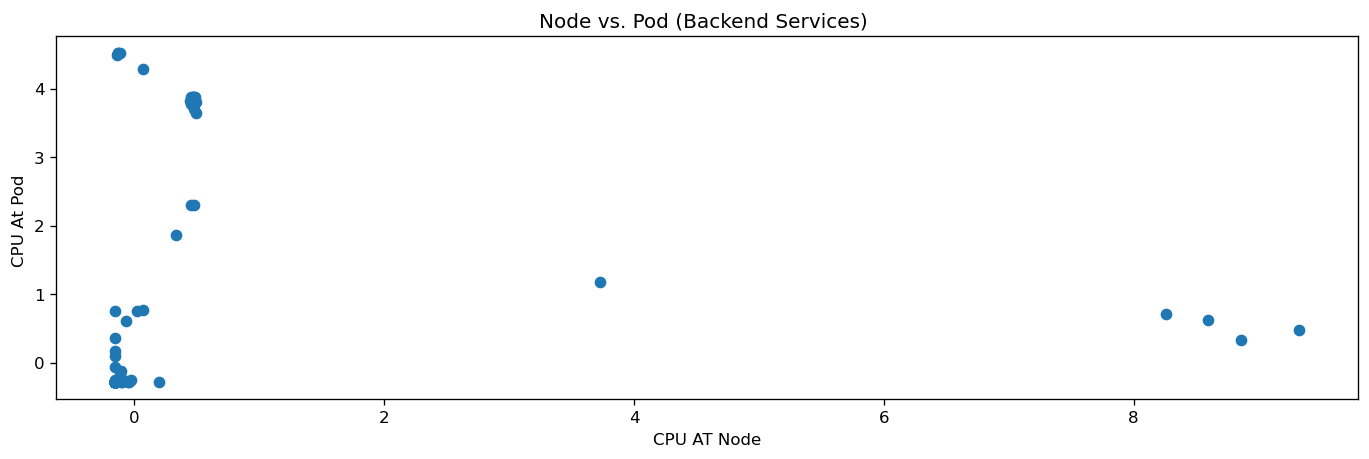

In [17]:
plt.figure(figsize=(14,4))
plt.scatter(df.CPU_Pod_Frontend, df.CPU_Node_Frontend)
plt.xlabel('CPU AT Node')
plt.ylabel('CPU At Pod ')
plt.title('Node vs. Pod (Backend Services) ')
plt.show()

In [9]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

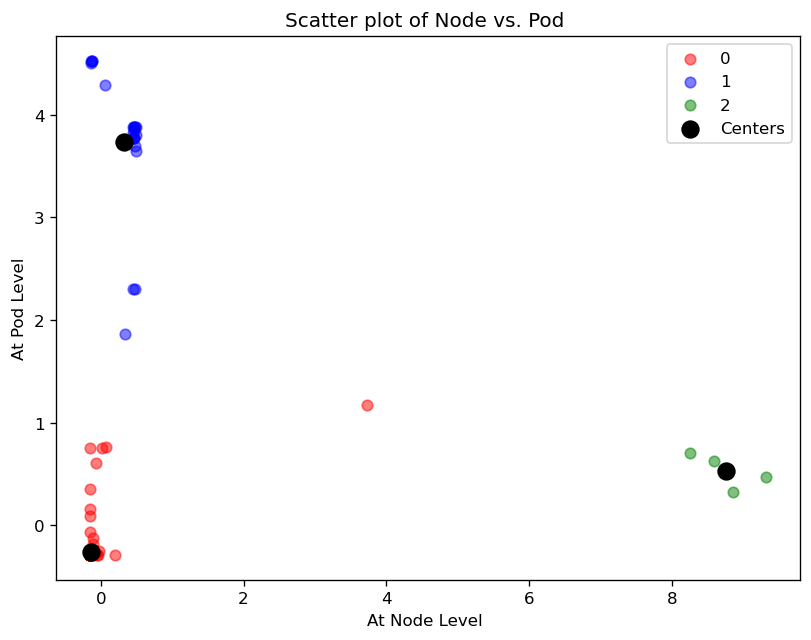

In [18]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Pod_Frontend, df[model.labels_==i].CPU_Node_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data (Backend Services)",size=20)
plt.xlabel("At Node Level ")
plt.ylabel("At Pod Level")
plt.title('Scatter plot of Node vs. Pod ')
plt.legend()
plt.show()

In [19]:
def distance_from_center(CPU_Pod_Frontend, CPU_Node_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Node CPU Usage: the standardized CPU Usage of the data point 
    :param float Pod Cpu Usage: the standardized cpu at Pod of the data point 
    :param int label: the label of the  cluster formed
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center_CPU_Pod =  model.cluster_centers_[label,0]
    center_CPU_Node =  model.cluster_centers_[label,1]
    distance = np.sqrt((df.CPU_Pod_Frontend - center_CPU_Pod) ** 2 + (df.CPU_Node_Frontend - center_CPU_Node) ** 2)
    return np.round(distance, 2)

    # Label and distance column defined 
df['label'] = model.labels_
df['distance'] = distance_from_center(df.CPU_Pod_Frontend, df.CPU_Node_Frontend, df.label)    


In [20]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     CPU_Pod_Frontend  CPU_Node_Frontend  label  distance
104          0.019167           0.749863      0      1.02
119         -0.154128           0.755036      0      1.02
132          0.332980           1.859606      1      1.87
162          0.068926           0.762797      0      1.05
172          0.479604           2.300709      1      1.44
173          0.449748           2.300838      1      1.44
282         -0.129646           4.524023      1      0.92
283         -0.117239           4.524023      1      0.91
292         -0.131835           4.524023      1      0.92
297          3.730527           1.168926      0      4.12


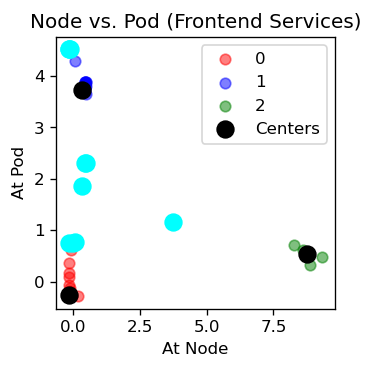

In [24]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Pod_Frontend, df[model.labels_==i].CPU_Node_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.CPU_Pod_Frontend, outliers.CPU_Node_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Node")
plt.ylabel("At Pod")
plt.title('Node vs. Pod (Frontend Services)')
plt.legend()
plt.show()